In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import numpy as np
import scipy.signal as signal
import scipy.io.wavfile as wav
import random

In [75]:
sneeze_train_path = './data/train/sneeze'
sneeze_test_path = './data/test/sneeze'

In [76]:
list_train_files = []
for root, dirs, files in os.walk(sneeze_train_path):
    for file in files:
        file_path = os.path.join(root, file)
        if file_path.endswith('wav'):
            list_train_files.append(file_path)
list_test_files = []

for root, dirs, files in os.walk(sneeze_test_path):
    for file in files:
        file_path = os.path.join(root, file)
        if file_path.endswith('wav'):
            list_test_files.append(file_path)

print('Number of train files:', len(list_train_files))
print('Number of test files:', len(list_test_files))

Number of train files: 347
Number of test files: 424


In [77]:
train_sample_rates = {}
train_signals = {}
for file in list_train_files:
    sr, data = wav.read(file)
    if data.ndim > 1:
        data = np.mean(data, axis=1)
    train_signals[file] = [data, sr]
    if sr not in train_sample_rates.keys():
        train_sample_rates[sr] = 1
    else:
        train_sample_rates[sr] += 1
        
test_sample_rates = {}
test_signals = {}
for file in list_test_files:
    sr, data = wav.read(file)
    if data.ndim > 1:
        data = np.mean(data, axis=1)
    test_signals[file] = [data, sr]
    if sr not in test_sample_rates.keys():
        test_sample_rates[sr] = 1
    else:
        test_sample_rates[sr] += 1

for key, value in train_sample_rates.items():
    print('--Train--')
    print('Sample rate:', key, '    Number of files:', str(value))
for key, value in test_sample_rates.items():
    print('--Test--')
    print('Sample rate:', key, '    Number of files:', str(value))

--Train--
Sample rate: 8000     Number of files: 347
--Test--
Sample rate: 8000     Number of files: 424


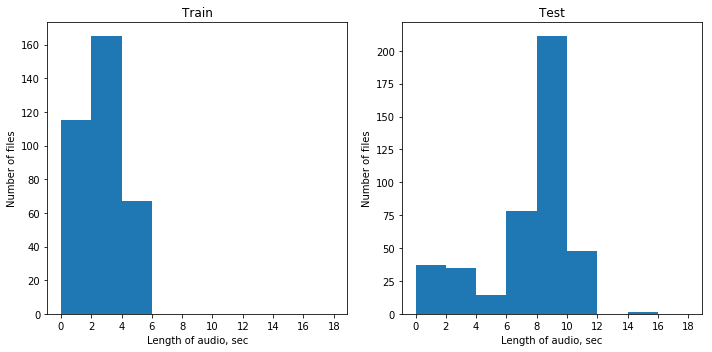

In [78]:
train_lengths = []
for value in train_signals.values():
    train_lengths.append(value[0].shape[0] / value[1])
test_lengths = []
for value in test_signals.values():
    test_lengths.append(value[0].shape[0] / value[1])

fig, axes = plt.subplots(1,2, figsize=(10, 5))
axes[0].hist(train_lengths, bins=np.arange(0, 19, step=2))
axes[1].hist(test_lengths, bins=np.arange(0, 19, step=2))
for ax in axes:
    ax.set_xticks(np.arange(0, 19, step=2))
    ax.set_xlabel('Length of audio, sec')
    ax.set_ylabel('Number of files')
    ax.set_title('Train' if ax==axes[0] else 'Test')
plt.tight_layout()
plt.show()

In [79]:
longest = ''
length = 0
for key, value in train_signals.items():
    if length < value[0].shape[0]:
        length = value[0].shape[0]
        longest = key
print('The longest audio:\n', longest)
print('The length:', length / 8000, 'sec')

The longest audio:
 ./data/train/sneeze/youtube_sneeze_2/sneeze_yt_197.wav
The length: 4.819875 sec


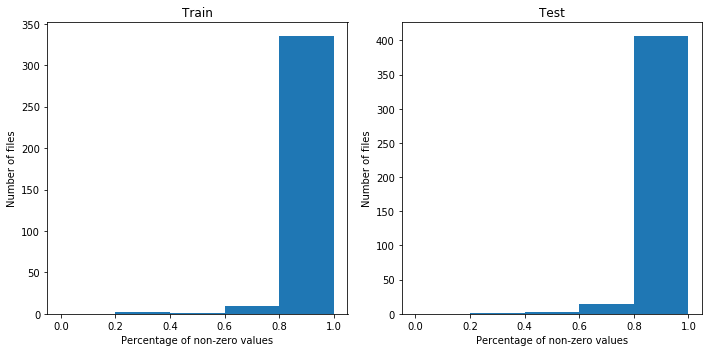

In [80]:
train_non_zero = []
for value in train_signals.values():
    zero_value = value[0][value[0] == 0]
    train_non_zero.append(1 - (zero_value.shape[0] / value[0].shape[0]))
test_non_zero = []
for value in test_signals.values():
    zero_value = value[0][value[0] == 0]
    test_non_zero.append(1 - (zero_value.shape[0] / value[0].shape[0]))

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].hist(train_non_zero, bins = np.arange(0, 1.1, step=0.2))
axes[1].hist(test_non_zero, bins = np.arange(0, 1.1, step=0.2))
for ax in axes:
    ax.set_xticks(np.arange(0, 1.1, step=0.2))
    ax.set_xlabel('Percentage of non-zero values')
    ax.set_ylabel('Number of files')
    ax.set_title('Train' if ax==axes[0] else 'Test')
plt.tight_layout()
plt.show()

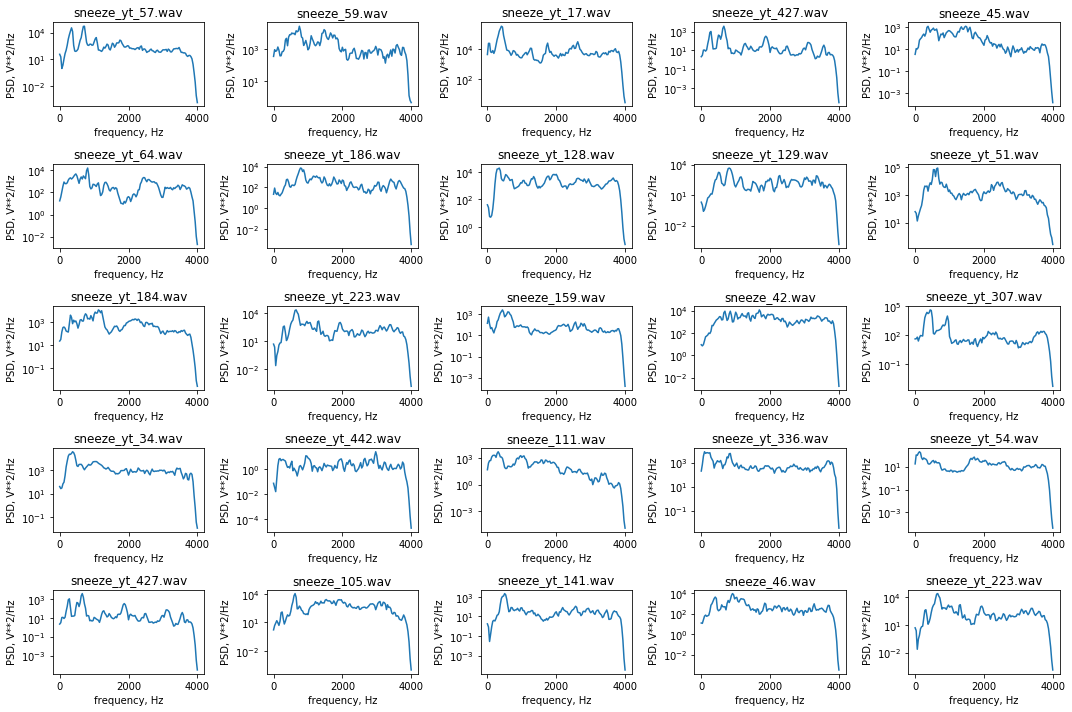

In [81]:
plot_num = 25
columns = 5
sub_train_signals = random.choices(list(train_signals.items()), k=plot_num)
fig, axes = plt.subplots(int(np.ceil(plot_num / columns)), columns, figsize=(15,10))
for i in range(plot_num):
    r,c = i // columns, i % columns
    file, sound = sub_train_signals[i]
    f, Pxx = signal.welch(sound[0], fs=sound[1])
    axes[r,c].semilogy(f, Pxx)
    axes[r,c].set_title(os.path.split(file)[-1])
    axes[r,c].set_xlabel('frequency, Hz')
    axes[r,c].set_ylabel('PSD, V**2/Hz')
    axes[r,c].set_xticks([0, 2000, 4000])
plt.tight_layout()
plt.show()

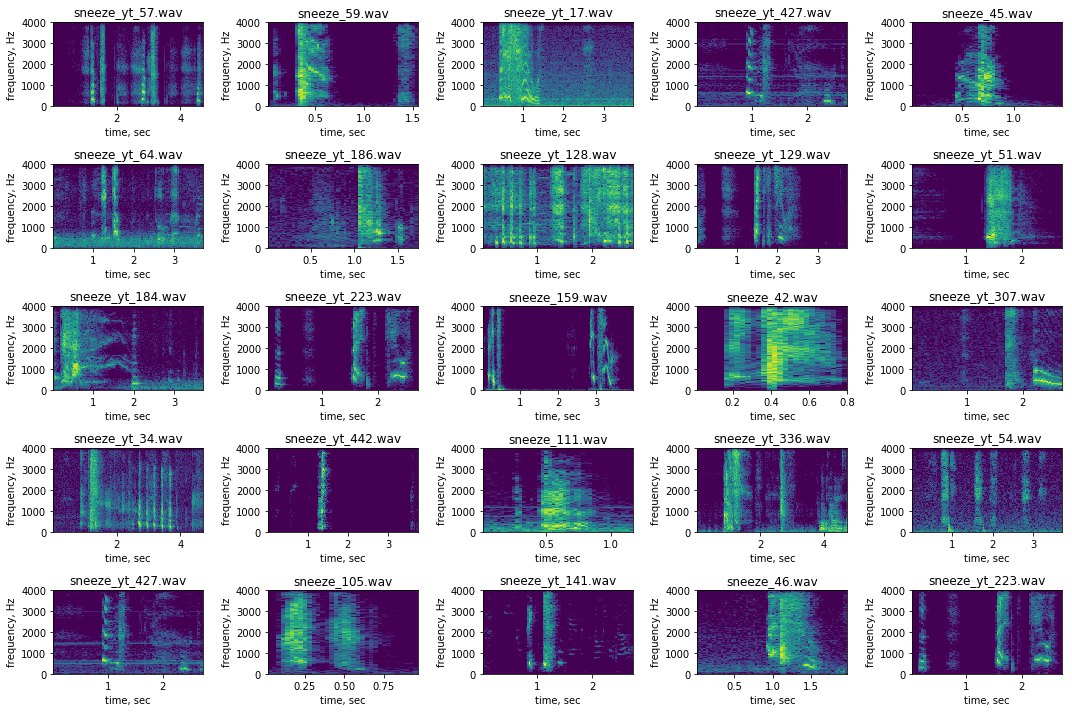

In [82]:
fig, axes = plt.subplots(int(np.ceil(plot_num / columns)), columns, figsize=(15,10))
for i in range(plot_num):
    r,c = i // columns, i % columns
    file, sound = sub_train_signals[i]
    f, t, Sxx = signal.spectrogram(sound[0], fs=sound[1])
    d = 20 * np.log10(Sxx + 1e-10)
    axes[r,c].pcolormesh(t, f, d, vmin=-1e1, vmax=d.max())
    axes[r,c].set_title(os.path.split(file)[-1])
    axes[r,c].set_ylabel('frequency, Hz')
    axes[r,c].set_xlabel('time, sec')
plt.tight_layout()
plt.show()

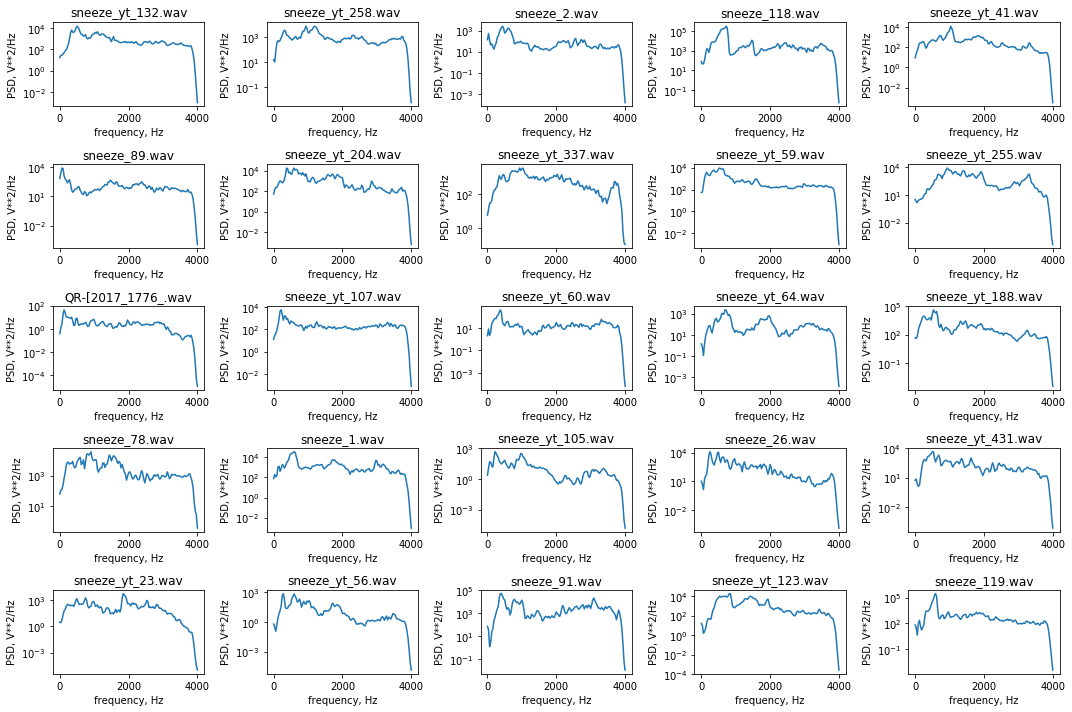

In [83]:
plot_num = 25
columns = 5
sub_test_signals = random.choices(list(test_signals.items()), k=plot_num)
fig, axes = plt.subplots(int(np.ceil(plot_num / columns)), columns, figsize=(15,10))
for i in range(plot_num):
    r,c = i // columns, i % columns
    file, sound = sub_test_signals[i]
    f, Pxx = signal.welch(sound[0], fs=sound[1])
    axes[r,c].semilogy(f, Pxx)
    axes[r,c].set_title(os.path.split(file)[-1])
    axes[r,c].set_xlabel('frequency, Hz')
    axes[r,c].set_ylabel('PSD, V**2/Hz')
    axes[r,c].set_xticks([0, 2000, 4000])
plt.tight_layout()
plt.show()

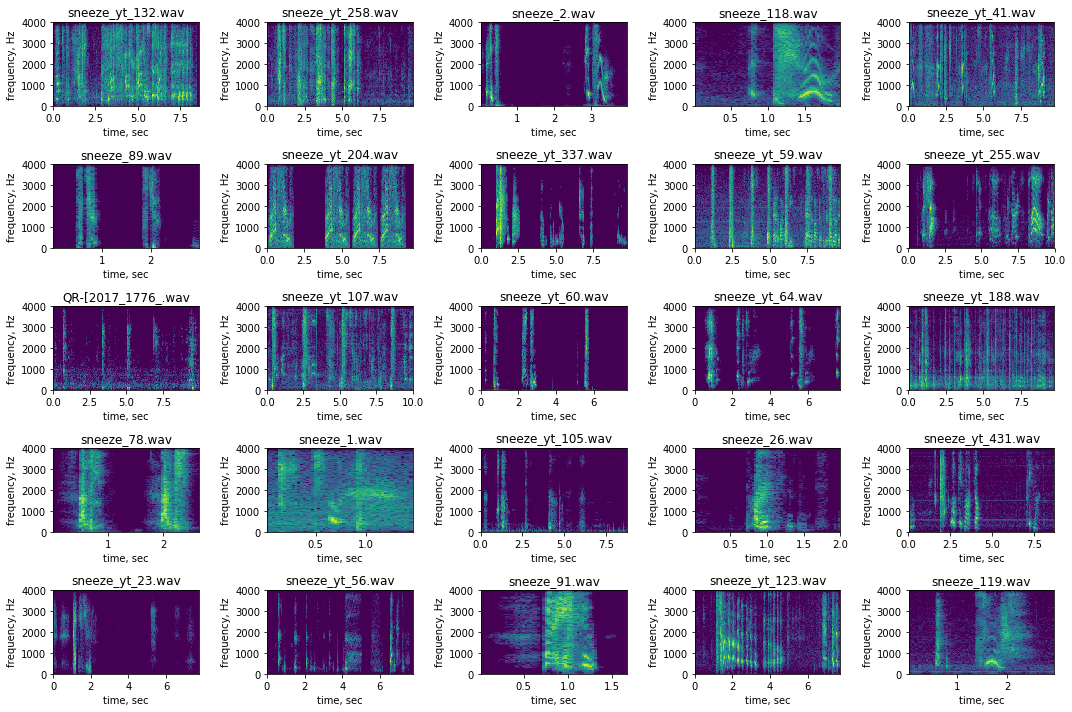

In [84]:
fig, axes = plt.subplots(int(np.ceil(plot_num / columns)), columns, figsize=(15,10))
for i in range(plot_num):
    r,c = i // columns, i % columns
    file, sound = sub_test_signals[i]
    f, t, Sxx = signal.spectrogram(sound[0], fs=sound[1])
    d = 20 * np.log10(Sxx + 1e-10)
    axes[r,c].pcolormesh(t, f, d, vmin=-1e1, vmax=d.max())
    axes[r,c].set_title(os.path.split(file)[-1])
    axes[r,c].set_ylabel('frequency, Hz')
    axes[r,c].set_xlabel('time, sec')
plt.tight_layout()
plt.show()

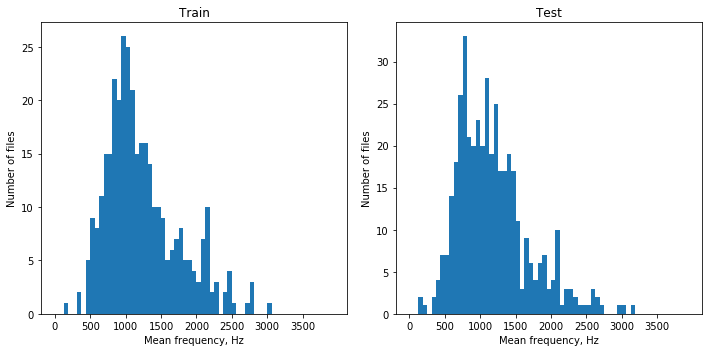

In [85]:
train_mean_freq = []
train_main_freq = []
for _, sound in train_signals.items():
    f, Pxx = signal.welch(sound[0], fs=sound[1], scaling='density')
    mean_freq = np.sum(f * Pxx) / np.sum(Pxx)
    idx = np.argmax(Pxx)
    train_main_freq.append(f[idx])
    train_mean_freq.append(mean_freq)
test_mean_freq = []
test_main_freq = []
for _, sound in test_signals.items():
    f, Pxx = signal.welch(sound[0], fs=sound[1], scaling='density')
    mean_freq = np.sum(f * Pxx) / np.sum(Pxx)
    idx = np.argmax(Pxx)
    test_main_freq.append(f[idx])
    test_mean_freq.append(mean_freq)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].hist(train_mean_freq, bins = np.arange(0, 4000, step=62.5))
axes[1].hist(test_mean_freq, bins = np.arange(0, 4000, step=62.5))
for ax in axes:
    ax.set_xticks(np.arange(0, 4000, step=500))
    ax.set_xlabel('Mean frequency, Hz')
    ax.set_ylabel('Number of files')
    ax.set_title('Train' if ax==axes[0] else 'Test')
plt.tight_layout()
plt.show()

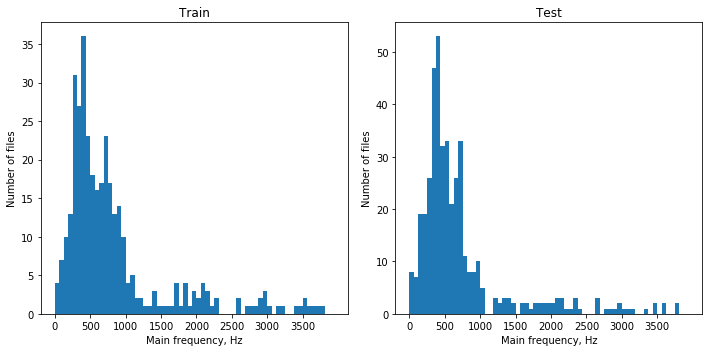

In [86]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].hist(train_main_freq, bins = np.arange(0, 4000, step=62.5))
axes[1].hist(test_main_freq, bins = np.arange(0, 4000, step=62.5))
for ax in axes:
    ax.set_xticks(np.arange(0, 4000, step=500))
    ax.set_xlabel('Main frequency, Hz')
    ax.set_ylabel('Number of files')
    ax.set_title('Train' if ax==axes[0] else 'Test')
plt.tight_layout()
plt.show()

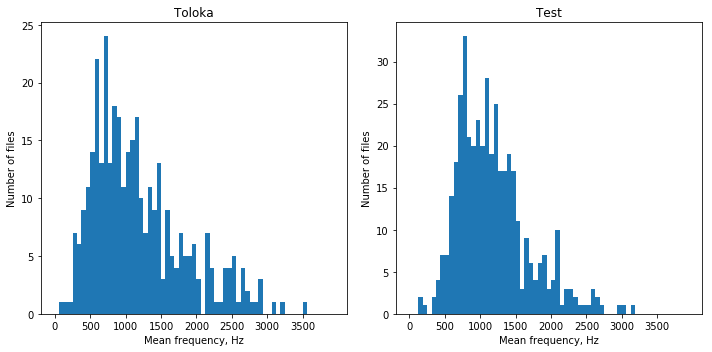

In [89]:
sneeze_toloka_train_path = './data/train/sneeze_toloka_filtered'
list_toloka_files = []
for root, dirs, files in os.walk(sneeze_toloka_train_path):
    for file in files:
        file_path = os.path.join(root, file)
        if file_path.endswith('wav'):
            list_toloka_files.append(file_path)

toloka_signals = {}
for file in list_toloka_files:
    sr, data = wav.read(file)
    if data.ndim > 1:
        data = np.mean(data, axis=1)
    toloka_signals[file] = [data, sr]
    
toloka_mean_freq = []
toloka_main_freq = []
for _, sound in toloka_signals.items():
    f, Pxx = signal.welch(sound[0], fs=sound[1], scaling='density')
    mean_freq = np.sum(f * Pxx) / np.sum(Pxx)
    idx = np.argmax(Pxx)
    toloka_main_freq.append(f[idx])
    toloka_mean_freq.append(mean_freq)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].hist(toloka_mean_freq, bins = np.arange(0, 4000, step=62.5))
axes[1].hist(test_mean_freq, bins = np.arange(0, 4000, step=62.5))
for ax in axes:
    ax.set_xticks(np.arange(0, 4000, step=500))
    ax.set_xlabel('Mean frequency, Hz')
    ax.set_ylabel('Number of files')
    ax.set_title('Toloka' if ax==axes[0] else 'Test')
plt.tight_layout()
plt.show()

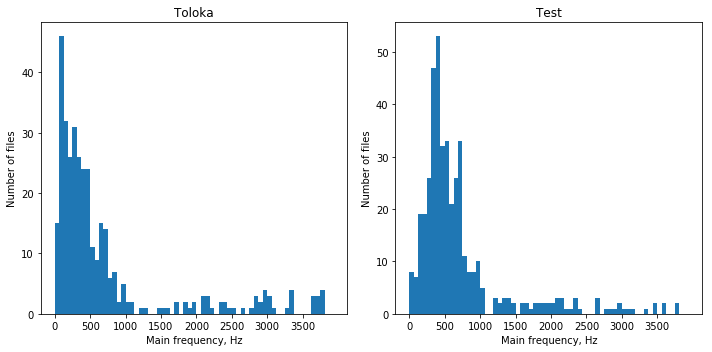

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].hist(toloka_main_freq, bins = np.arange(0, 4000, step=62.5))
axes[1].hist(test_main_freq, bins = np.arange(0, 4000, step=62.5))
for ax in axes:
    ax.set_xticks(np.arange(0, 4000, step=500))
    ax.set_xlabel('Main frequency, Hz')
    ax.set_ylabel('Number of files')
    ax.set_title('Toloka' if ax==axes[0] else 'Test')
plt.tight_layout()
plt.show()